In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
from xgboost import XGBClassifier as xgb

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Data collection & Data cleaning



### df2: https://www.kaggle.com/api/v1/datasets/download/mexwell/heart-disease-dataset
### df3: https://www.kaggle.com/api/v1/datasets/download/fedesoriano/heart-failure-prediction


In [2]:
df1=pd.read_csv(r'E:\Project\HeartHealthDiseases\datasets\heart dis.csv')
df2=pd.read_csv(r'E:\Project\HeartHealthDiseases\datasets\heart_statlog_cleveland_hungary_final.csv')
df3=pd.read_csv(r'E:\Project\HeartHealthDiseases\datasets\heart.csv')

In [3]:
df1.head(1)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0


In [4]:
print(f"ChestPainType: {df1['ChestPain'].unique()}")

ChestPainType: ['typical' 'asymptomatic' 'nonanginal' 'nontypical']


In [5]:
print(f"Slope: {df1['Slope'].unique()}")

Slope: [3 2 1]


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [7]:
le=LabelEncoder()

for col in df1.select_dtypes(include='object').columns:
    df1[col] = le.fit_transform(df1[col])

In [8]:
df1 = df1.drop(['Ca','Thal'],axis=1)

In [9]:
# Rename the columns (example: change 'old_column' to 'new_column')
df1.rename(columns={'ChestPain': 'ChestPainType',
                    'RestBP': 'RestingBP',
                    'Chol': 'Cholesterol',
                    'Fbs': 'FastingBS',
                    'RestECG': 'RestingECG',
                    'ExAng': 'ExerciseAngina',
                    'Slope': 'ST_Slope',
                    'Target': 'HeartDisease',

}, inplace=True)

In [10]:
df2.head(1)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0


In [11]:
print(f"ChestPainType: {df2['chest pain type'].unique()}")

ChestPainType: [2 3 4 1]


In [12]:
print(f"ST slope: {df2['ST slope'].unique()}")

ST slope: [1 2 3 0]


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [14]:
# Rename the columns (example: change 'old_column' to 'new_column')
df2.rename(columns={'age': 'Age',
                    'sex': 'Sex', 
                    'chest pain type': 'ChestPainType',
                    'resting bp s': 'RestingBP',
                    'cholesterol': 'Cholesterol',
                    'fasting blood sugar': 'FastingBS',
                    'resting ecg': 'RestingECG',
                    'max heart rate': 'MaxHR',
                    'exercise angina': 'ExerciseAngina',
                    'oldpeak': 'Oldpeak',
                    'ST slope': 'ST_Slope',
                    'target': 'HeartDisease',

}, inplace=True)

In [15]:
df3.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


In [16]:
print(f"ChestPainType: {df3['ChestPainType'].unique()}")

ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']


In [17]:
print(f"ST_Slope: {df3['ST_Slope'].unique()}")

ST_Slope: ['Up' 'Flat' 'Down']


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [19]:
le=LabelEncoder()

for col in df3.select_dtypes(include='object').columns:
    df3[col] = le.fit_transform(df3[col])

In [20]:
# دمج البيانات
df = pd.concat([df1, df2, df3], ignore_index=True)

# Exploratory Data Analysis (EDA)

In [21]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [22]:
df.duplicated().sum()

np.int64(322)

In [23]:
df = df.drop_duplicates()

In [24]:
print("Shape(heart_data) :",df.shape,"\n")
print("\nDescriptive statistics:\n", df.describe(),"\n")

Shape(heart_data) : (2089, 12) 


Descriptive statistics:
                Age          Sex  ChestPainType    RestingBP  Cholesterol  \
count  2089.000000  2089.000000    2089.000000  2089.000000  2089.000000   
mean     53.696984     0.777405       1.846338   132.389660   204.645764   
std       9.371412     0.416088       1.558513    18.430448   105.362856   
min      28.000000     0.000000       0.000000     0.000000     0.000000   
25%      47.000000     1.000000       0.000000   120.000000   182.000000   
50%      54.000000     1.000000       2.000000   130.000000   225.000000   
75%      60.000000     1.000000       3.000000   140.000000   268.000000   
max      77.000000     1.000000       4.000000   200.000000   603.000000   

         FastingBS   RestingECG        MaxHR  ExerciseAngina      Oldpeak  \
count  2089.000000  2089.000000  2089.000000     2089.000000  2089.000000   
mean      0.224031     0.825275   138.052657        0.400670     0.923121   
std       0.417042     0.

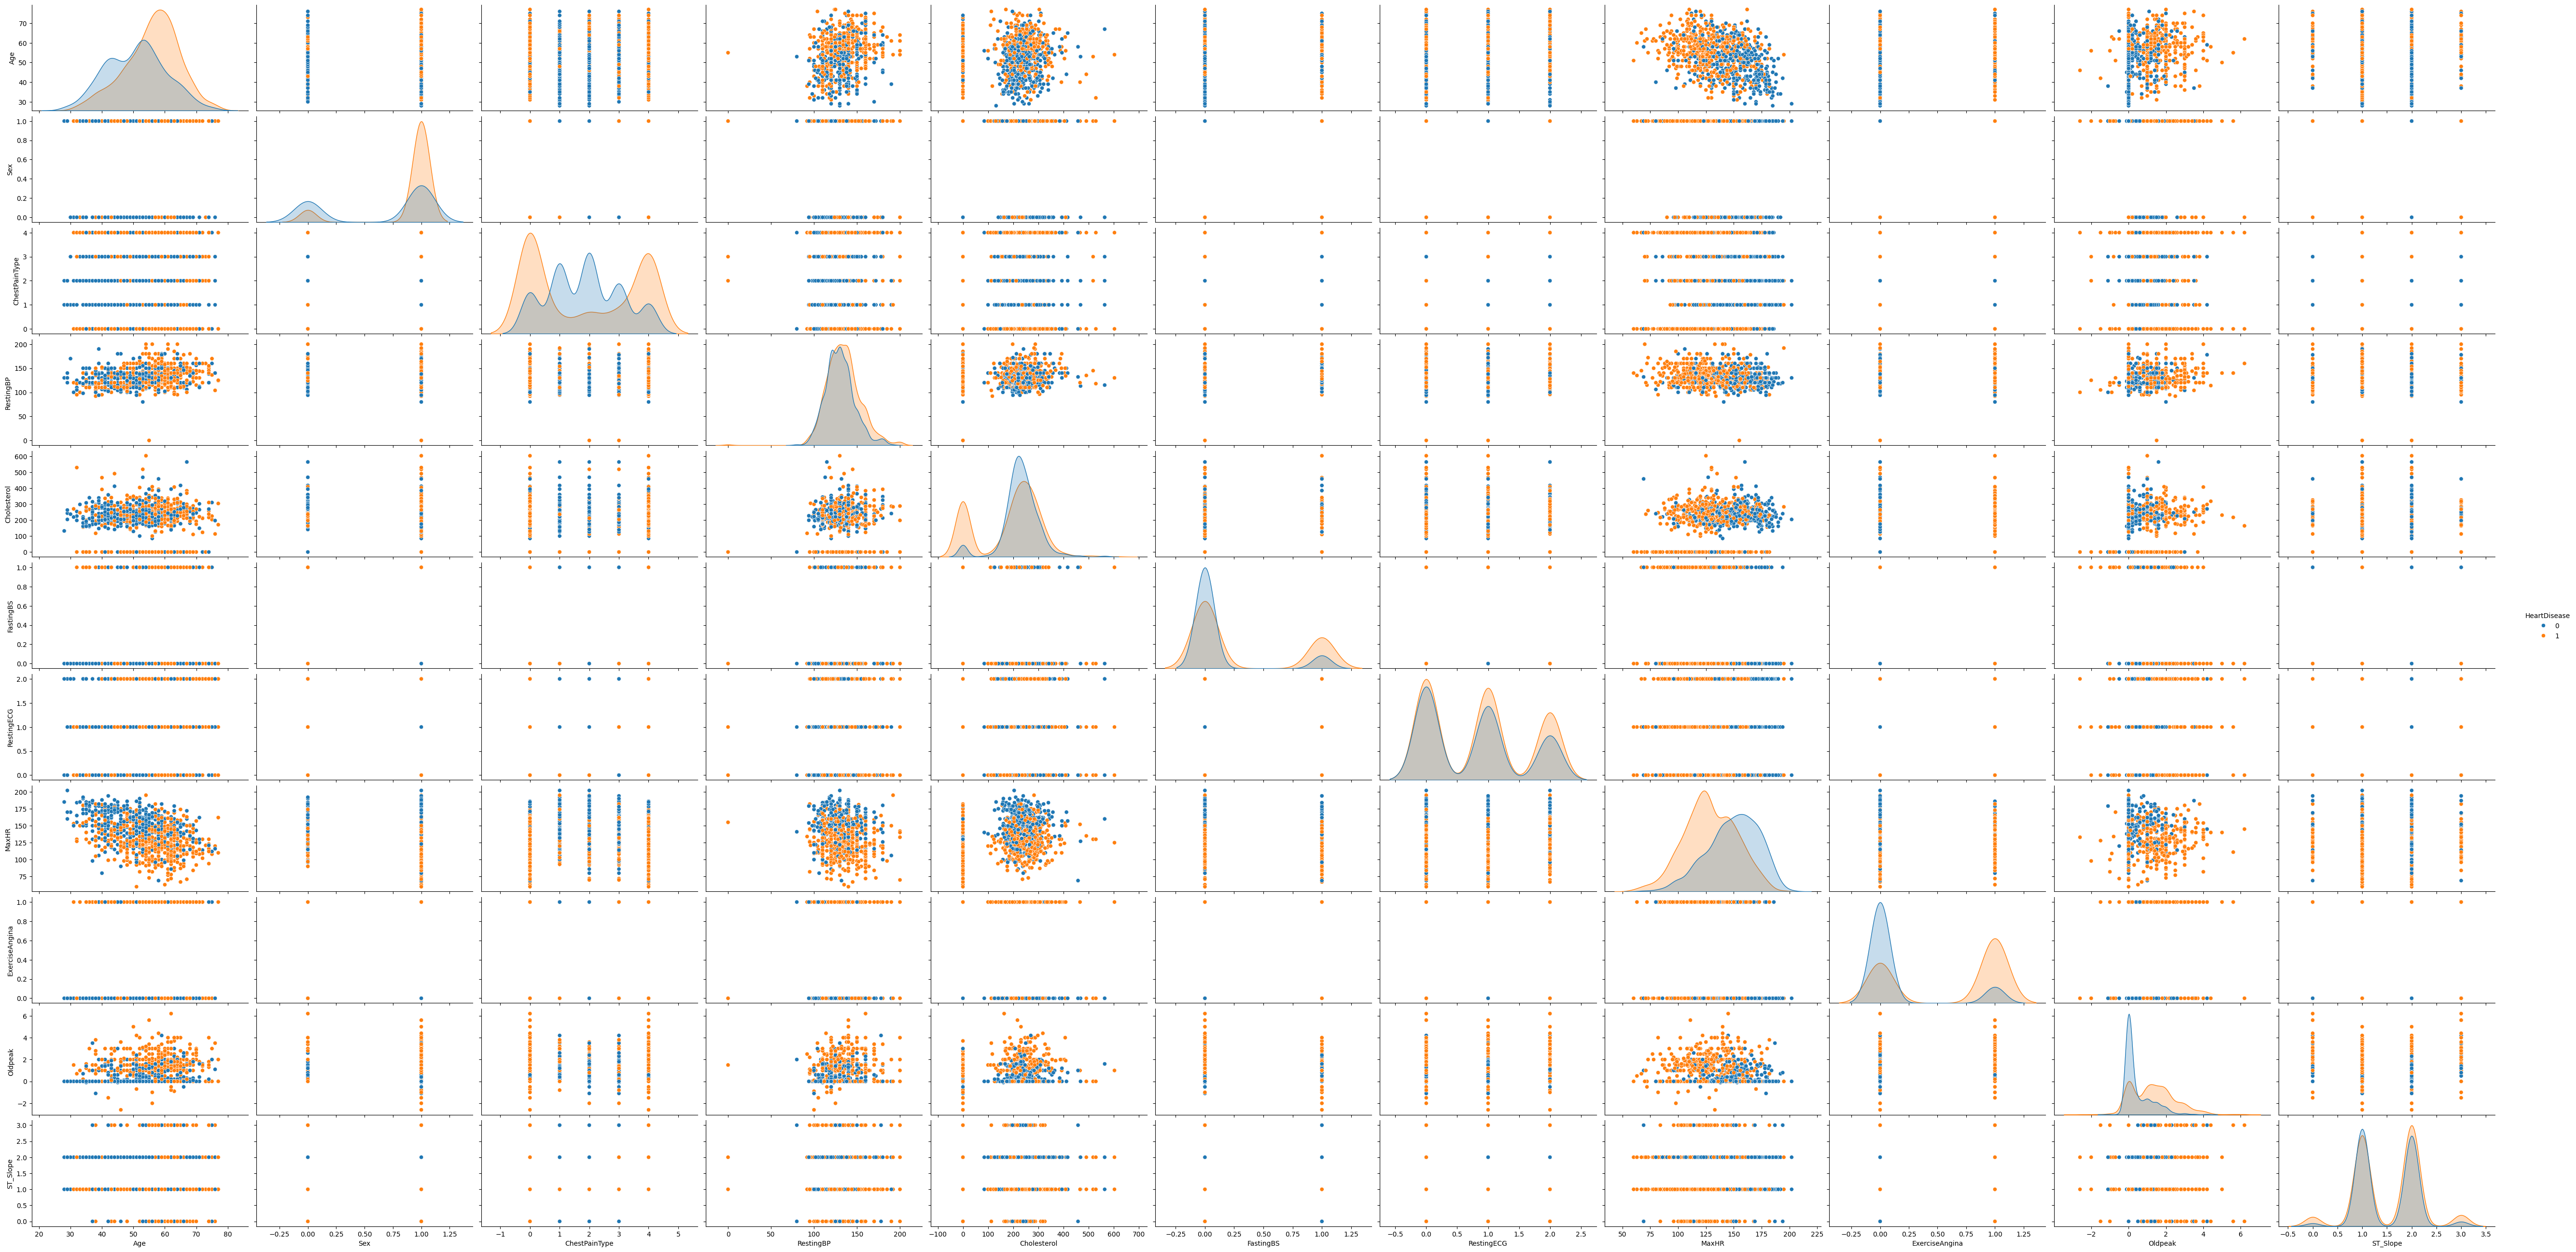

In [25]:
sns.pairplot(df, hue='HeartDisease', height=2.4, aspect=2)

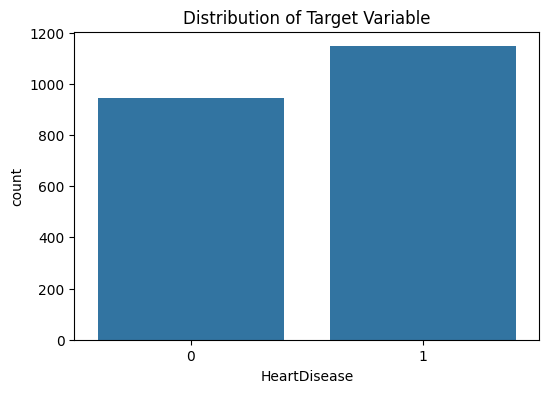

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Target Variable')
plt.show()

Text(0.5, 0, 'Frequency')

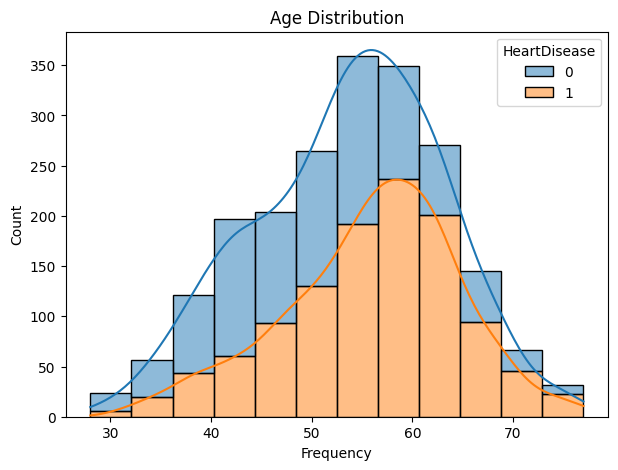

In [27]:
plt.figure(figsize=(7,5))
sns.histplot(data = df, bins = 12, x='Age', hue='HeartDisease', multiple='stack', kde=True)
plt.title('Age Distribution')
plt.xlabel('Frequency')

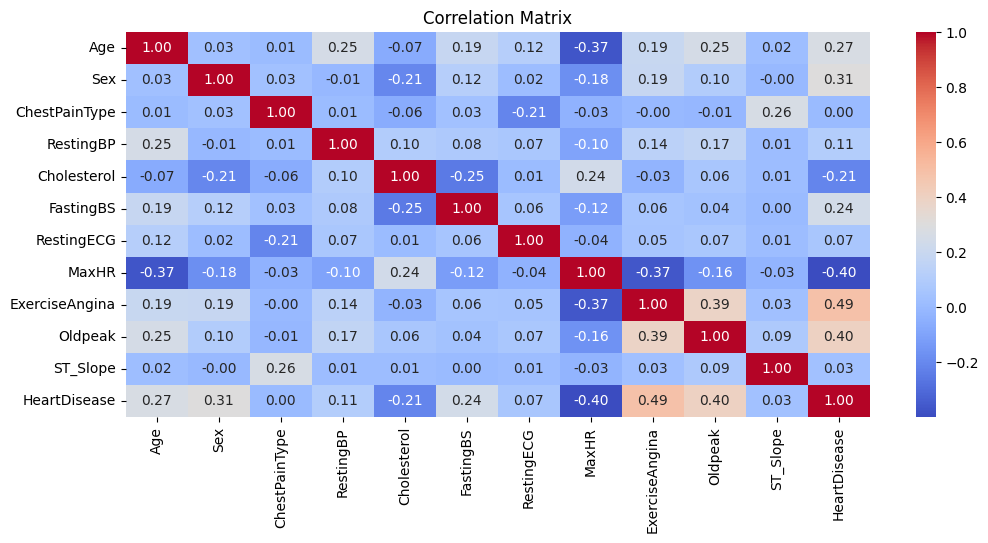

In [28]:
plt.figure(figsize=(12, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Data preprocessing


In [29]:
X = df.drop('HeartDisease', axis=1)   #تنبؤ
y = df['HeartDisease']                #تصنيف

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building model


In [32]:
base_learners = [
    ('xgb', xgb(n_estimators=300)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(max_iter=1000))


In [33]:
stacking_model.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_const...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression(max_iter=1000))

In [34]:
predictions = stacking_model.predict(X_test_scaled)

In [35]:
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy: {np.round(accuracy*100,2)} %")


Accuracy: 97.61 %


# Evaluating the model


In [36]:
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score

# Perform cross-validation to get predictions
scores = cross_val_score(stacking_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

var=np.var(scores)
std=np.std(scores)

print("Cross-validation variance:", var)
print("Cross-validation std:", std)


Cross-validation variance: 0.0004751493695119101
Cross-validation std: 0.021797921219967518


In [37]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       189
           1       0.98      0.98      0.98       229

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



In [38]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[184   5]
 [  5 224]]


# Test 2 samples

In [39]:
def predict_disease(model, scaler, new_data):
    # Scale the new data
    scaled_data = scaler.transform(new_data)
    
    # Get the probability estimates
    probabilities = model.predict_proba(scaled_data)
    
    # Return the percentage chance of having the disease (probability of class 1)
    return probabilities[0][1] * 100

# Define the new patient data (have)
new_data_1 = pd.DataFrame({
    'Age': [60],
    'Sex': [1],
    'ChestPainType': [2],
    'RestingBP': [140],
    'Cholesterol': [280],
    'FastingBS': [1],
    'RestingECG': [0],
    'MaxHR': [150],
    'ExerciseAngina': [1],
    'Oldpeak': [2.5],
    'ST_Slope': [1]
})
# (not have)
new_data_2 = pd.DataFrame({
    'Age': [45],
    'Sex': [0],
    'ChestPainType': [3],
    'RestingBP': [130],
    'Cholesterol': [220],
    'FastingBS': [0],
    'RestingECG': [1],
    'MaxHR': [160],
    'ExerciseAngina': [0],
    'Oldpeak': [1.0],
    'ST_Slope': [0]
})

# Predict the disease probability for each patient
probability_1 = predict_disease(stacking_model, scaler, new_data_1)
probability_2 = predict_disease(stacking_model, scaler, new_data_2)

# Display the results
print("Percentage chance of having the disease for Patient 1:", probability_1, "%")
print("Percentage chance of having the disease for Patient 2:", probability_2, "%")


Percentage chance of having the disease for Patient 1: 95.82374492629897 %
Percentage chance of having the disease for Patient 2: 3.9724105375405356 %


In [43]:
joblib.dump(stacking_model, r'E:\Project\HeartHealthDiseases\model.pkl')

['E:\\Project\\HeartHealthDiseases\\model.pkl']

In [44]:
joblib.dump(scaler, r'E:\Project\HeartHealthDiseases\scaler.pkl')

['E:\\Project\\HeartHealthDiseases\\scaler.pkl']